In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#import plotly.express as px

In [2]:
file = 'df2clustering.csv'
df = pd.read_csv(file, index_col=0)
df

,Revenue_T,Category,ManufacturerID_x,IsCompete,MonthNo,Year,City,State,cluster
Units,,,,,,,,,
12,31676.40,Urban,8,No,12,2014,"Newington, CT",CT,3
7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA,7
7,11020.59,Rural,10,No,12,2014,"Corona, CA",CA,7
3,35010.36,Urban,7,Yes,12,2014,"Melbourne, FL",FL,9
3,16441.11,Rural,4,No,12,2014,"Saint George, UT",UT,9
...,...,...,...,...,...,...,...,...,...
1,5291.37,Urban,8,No,4,2002,"Islip Terrace, NY",NY,0
1,5291.37,Urban,8,No,4,2002,"Waynesboro, MS",MS,0
1,6614.37,Urban,14,No,4,2002,"Bremerton, WA",WA,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 12 to 1
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Revenue_T         1048534 non-null  float64
 1   Category          1048575 non-null  object 
 2   ManufacturerID_x  1048575 non-null  int64  
 3   IsCompete         1048575 non-null  object 
 4   MonthNo           1048575 non-null  int64  
 5   Year              1048575 non-null  int64  
 6   City              1048575 non-null  object 
 7   State             1048575 non-null  object 
 8   cluster           1048575 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 80.0+ MB


In [4]:
df1, df2 = train_test_split(df, test_size = .01)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038089 entries, 1 to 1
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Revenue_T         1038048 non-null  float64
 1   Category          1038089 non-null  object 
 2   ManufacturerID_x  1038089 non-null  int64  
 3   IsCompete         1038089 non-null  object 
 4   MonthNo           1038089 non-null  int64  
 5   Year              1038089 non-null  int64  
 6   City              1038089 non-null  object 
 7   State             1038089 non-null  object 
 8   cluster           1038089 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 79.2+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10486 entries, 1 to 2
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Revenue_T         10486 non-null  float64
 1   Category          10486 non-null  object 
 2   ManufacturerID_x  10486 non-null  int64  
 3   IsCompete         10486 non-null  object 
 4   MonthNo           10486 non-null  int64  
 5   Year              10486 non-null  int64  
 6   City              10486 non-null  object 
 7   State             10486 non-null  object 
 8   cluster           10486 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 819.2+ KB


/tmp/ipykernel_95/3319144533.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


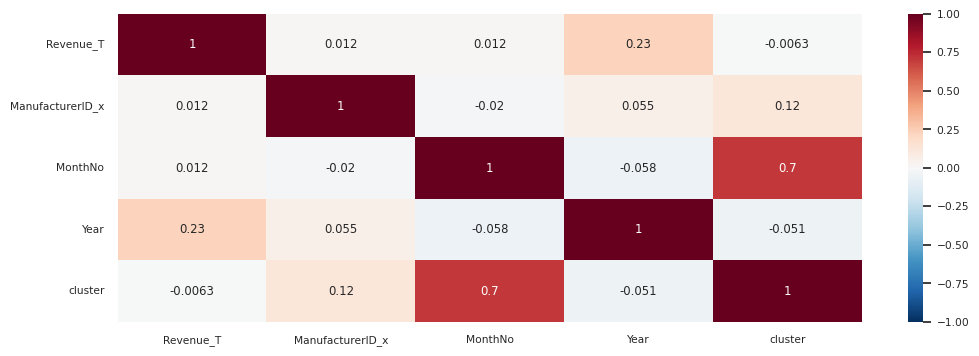

In [7]:
sns.set(font_scale=0.7)
plt.figure(figsize=(12,4))
sns.heatmap(
    df.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

/venv_autoeda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


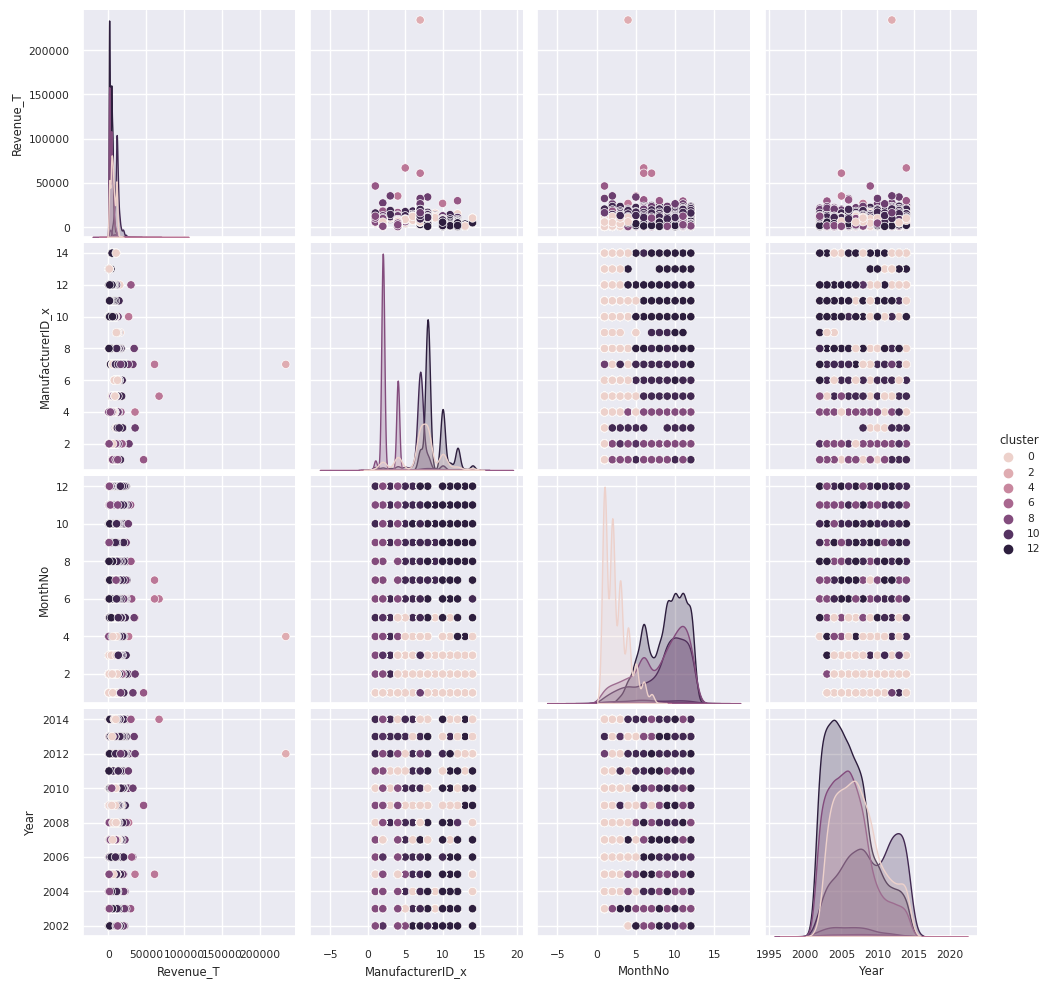

In [8]:
sns.pairplot(df2, hue='cluster')